In [11]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import math
import random 
from random import choices
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
data = open("/content/drive/MyDrive/dataset/data/x_train.csv")
x_train = np.loadtxt(data, delimiter=",")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# Control variables
population_size = 200
vocab_size = 8520
sen_size = len(x_train)
elite_size = 2
# new_ones = population_size * 0.1
cross_size = population_size - elite_size
cross_prob = 0.6
mutation_prob = 0
generation = 100

In [13]:
# Creating the tf-idf 
# Counting all the words in the texts
sen_len = []
counter = 0
for i in x_train:
  for j in i:
    if j != 0:
      counter += j
  sen_len.append(counter)
# Calculate tf
tf = []
for i in range(sen_size):
  temp = [0] * vocab_size  
  for j in range(vocab_size):
    if x_train[i][j] != 0:
      temp[j] = x_train[i][j] / sen_len[i]
  tf.append(temp)
# Calculate idf
idf = []
for i in range(vocab_size):
  counter = 0
  for j in range(sen_size):
    if x_train[j][i] != 0:
      counter += 1
  idf.append(math.log(sen_size / counter))
# Calculate the tf-idf
tf_idf = []
for i in range(vocab_size):
  temp = [0] * vocab_size
  for j in range(sen_size):
    temp[j] = tf[j][i] * idf[i]
  tf_idf.append(temp)
# Calculate the avg_tf_idf
avg = []
for i in range(vocab_size):
  temp = 0
  for j in range(sen_size):
    temp = temp + tf_idf[i][j]
  avg.append(temp)

In [16]:
final = []
# Scaling the fitness function
scaler = 10**6
for times in range(10):
  population = []
  solutions = []
  # Create the population
  for i in range(population_size):
    solutions = []
    ones = random.randint(0, vocab_size)
    temp = [0] * vocab_size 
    counter = 0
    while counter < ones:
      index = random.randint(0, vocab_size-1)
      if temp[index] == 0:
        temp[index] = 1
        counter += 1
    population.append(temp)
    
  for gen in range(generation):
    # Calculate fitness function 
    fitness = []
    # Stores all the invalid solutions with the number of words that are missing from being valid
    problematic = {}
    temp = 0
    counter = 0
    for i in range(population_size):
      for j in range(vocab_size):
        if population[i][j] == 1:
          counter += 1
          # First criteria
          temp = temp + avg[j]
      if counter < 1000:
        fitness.append(0)
        problematic[i] = 1000 - counter
        counter = 0
      else:
        # Second criteria
        temp = temp/(counter**2)
        fitness.append(scaler * temp)
      temp = 0
      counter = 0

    solutions.append(np.max(fitness))
    
    # Elitism for invalid populations or random replacement
    for i in range(population_size):
      if fitness[i] == 0:
        # Repair with adding words
        counter = problematic[i] 
        for j in range(vocab_size):
          if counter == 0:
            break
          if population[i][j] == 0:
            population[i][j] = 1
            counter -= 1
    # Getting the elite
    elite = []
    temp = fitness.copy()
    temp.sort(reverse=True)
    for i in range(elite_size):
      for j in range(population_size):
        if temp[i] == fitness[j]:
          elite.append(population[j])
          counter = 0
          for k in elite[i]:
            if k == 1:
              counter += 1
          break
      
    # Select the genes for crossover
    # Selection with Weighted Roulette
    selected = []
    temp = fitness.copy()
    for i in range(cross_size):
      max = sum(fitness)
      pick = random.uniform(0, max)
      current = 0
      for j in range(population_size):
        current += temp[j]
        if current > pick:
          selected.append(j)
          break

    # Generating new genes from crossover
    new_genes = []
    # Uniform crossover
    for i in range(0, cross_size, 2):
      if random.random() < cross_prob:
        temp = []
        # Creating the form
        for j in range(vocab_size):
          coin = random.randint(0, 1)
          if coin == 1:
            temp.append(population[selected[i]][j])
          else: 
            temp.append(population[selected[i+1]][j])
        child1 = []
        child2 = []
        for j in range(vocab_size):
          if temp[j] == 1:
            child1.append(population[selected[i]][j])
            child2.append(population[selected[i+1]][j])
          else:
            child1.append(population[selected[i+1]][j])
            child2.append(population[selected[i]][j])
        new_genes.append(child1.copy())
        new_genes.append(child2.copy())
      else:
        new_genes.append(population[selected[i]].copy())
        new_genes.append(population[selected[i+1]].copy())

    for i in elite:
      counter = 0
      for j in i:
        if j == 1:
          counter += 1
    # Mutation
    for i in range(cross_size):
      for j in range(vocab_size):
        if random.random() < mutation_prob:
          new_genes[i][j] = abs(new_genes[i][j] - 1)

    # The genes that pass to the next generation
    population = []
    for i in elite:
      counter = 0
      for j in i:
        if j == 1:
          counter += 1
      population.append(i)
  
    for i in new_genes:
      counter = 0
      for j in i:
        if j == 1:
          counter += 1
      population.append(i)
    
  final.append(solutions)
  print("final " + str(final))

evolution = []

for i in range(generation):
  temp = 0
  for j in range(times + 1):
    temp += final[j][i]
  temp = temp / (times + 1)
  evolution.append(temp)
print("evolution")
print(evolution)

final [[3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176292004, 3.8070409176

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

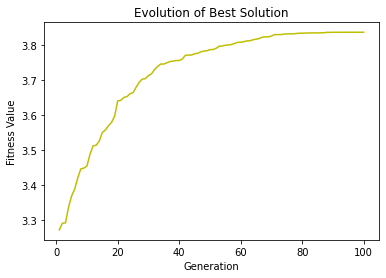

In [17]:
# Ploting the evolution of the best solution graph
generations = range(1, generation + 1)
plt.plot(generations, evolution, 'y', label='Evolution of Best Solution')
plt.title('Evolution of Best Solution')
plt.xlabel('Generation')
plt.ylabel('Fitness Value')
plt.savefig("evolution.png")
files.download("evolution.png") 
plt.show()

In [18]:
data = open("/content/drive/MyDrive/dataset/data/x_train.csv")
x_train = np.loadtxt(data, delimiter=",")

data = open("/content/drive/MyDrive/dataset/data/x_test.csv")
x_test = np.loadtxt(data, delimiter=",")
data = open("/content/drive/MyDrive/dataset/data/train-label.dat")
y_train = np.loadtxt(data, delimiter=" ", dtype='int')

data = open("/content/drive/MyDrive/dataset/data/test-label.dat")
y_test = np.loadtxt(data, delimiter=" ", dtype='int')
# Downsize the x_train according to the evolutionary algorithm
# Count how many words in the elite
counter = 0
for i in elite[0]:
  if i == 1:
    counter += 1

new_x_train = []
for i in range(len(x_train)):
  temp = [0] * counter
  for j in range(counter):
    if elite[0][j] == 1:
      temp[j] = x_train[i][j]
  new_x_train.append(temp)
x_train = new_x_train.copy()

new_x_test = []
for i in range(len(x_test)):
  temp = [0] * counter
  for j in range(counter):
    if elite[0][j] == 1:
      temp[j] = x_test[i][j]
  new_x_test.append(temp)
x_test = new_x_test.copy()

x_train = np.array(x_train)
x_test = np.array(x_test)

In [19]:
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from pandas import concat
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import cross_val_score
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import load_model
from sklearn import preprocessing
from sklearn.preprocessing import normalize, scale
from sklearn.model_selection import KFold
from tensorflow.compat.v1.losses import Reduction
from google.colab import files

In [ ]:
# Scaling the training and testing data
# Performing centering
x_train = x_train - x_train.mean()
print(x_train)
x_test = x_test - x_test.mean()
print(x_test)
epoch = 30
splits = 5
kfold = KFold(n_splits=splits, shuffle=True, random_state=2)

loss = []
val_loss = []
accuracy = []
val_accuracy = []

for i, (train, test) in enumerate(kfold.split(x_train)):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=(counter,1)))
  model.add(tf.keras.layers.Dense(units=4270, activation=tf.nn.relu))
  model.add(tf.keras.layers.Dense(units=20, activation=tf.nn.sigmoid))
  model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05, momentum=0.6), loss='mean_squared_error', metrics=['accuracy'])
  # model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.6), loss='binary_crossentropy', metrics=['accuracy'])

  history = model.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test), batch_size=32)
  los, acc = model.evaluate(x_test, y_test)
  loss.append(history.history['loss'])
  val_loss.append(history.history['val_loss'])
  accuracy.append(history.history['accuracy'])
  val_accuracy.append(history.history['val_accuracy'])

  print(loss)
  print(val_loss)
  print(acc)
  print(val_accuracy)

  
mean_loss = []
mean_val_loss = []
mean_accuracy = []
mean_val_accuracy = []
for i in range(epoch):
    temp_loss = 0
    temp_val_loss = 0
    temp_accuracy = 0
    temp_val_accuracy = 0
    for j in range(splits):
        temp_loss = temp_loss + loss[j][i]
        temp_val_loss = temp_val_loss + val_loss[j][i]
        temp_accuracy = temp_accuracy + accuracy[j][i]
        temp_val_accuracy = temp_val_accuracy + val_accuracy[j][i]
    mean_loss.append(temp_loss/ splits)
    mean_val_loss.append(temp_val_loss / splits)
    mean_accuracy.append(temp_accuracy / splits)
    mean_val_accuracy.append(temp_val_accuracy / splits)

print(mean_loss)
print(mean_val_loss)
print(mean_accuracy)
print(mean_val_accuracy)
# Plot training and
epochs = range(1, len(mean_loss) + 1)
plt.plot(epochs, mean_loss, 'y', label='Training loss')
plt.plot(epochs, mean_val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(["Train", 'Validation'], loc='upper right')
plt.savefig('/content/drive/MyDrive/plots/loss.png')
plt.savefig("loss.png")
files.download("loss.png") 
plt.show()


# Plot training and validation accuracy values
plt.plot(epochs, mean_accuracy, 'y', label='Training acc')
plt.plot(epochs, mean_val_accuracy, 'r', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.savefig('/content/drive/MyDrive/plots/acc.png')
plt.savefig("acc.png")
files.download("acc.png") 
plt.show()

print(los)
print(acc)

[[-0.00397327 -0.00397327 -0.00397327 ... -0.00397327 -0.00397327
  -0.00397327]
 [-0.00397327 -0.00397327 -0.00397327 ... -0.00397327 -0.00397327
  -0.00397327]
 [-0.00397327 -0.00397327 -0.00397327 ... -0.00397327 -0.00397327
  -0.00397327]
 ...
 [-0.00397327 -0.00397327 -0.00397327 ... -0.00397327 -0.00397327
  -0.00397327]
 [-0.00397327 -0.00397327 -0.00397327 ... -0.00397327 -0.00397327
  -0.00397327]
 [-0.00397327 -0.00397327 -0.00397327 ... -0.00397327 -0.00397327
  -0.00397327]]
[[-0.00408031 -0.00408031 -0.00408031 ... -0.00408031 -0.00408031
  -0.00408031]
 [-0.00408031 -0.00408031 -0.00408031 ... -0.00408031 -0.00408031
  -0.00408031]
 [-0.00408031 -0.00408031 -0.00408031 ... -0.00408031 -0.00408031
  -0.00408031]
 ...
 [-0.00408031 -0.00408031 -0.00408031 ... -0.00408031 -0.00408031
  -0.00408031]
 [-0.00408031 -0.00408031 -0.00408031 ... -0.00408031 -0.00408031
  -0.00408031]
 [-0.00408031 -0.00408031 -0.00408031 ... -0.00408031 -0.00408031
  -0.00408031]]
Epoch 1/30
258/2